# 欢迎来到线性回归项目

若项目中的题目有困难没完成也没关系，我们鼓励你带着问题提交项目，评审人会给予你诸多帮助。

所有选做题都可以不做，不影响项目通过。如果你做了，那么项目评审会帮你批改，也会因为选做部分做错而判定为不通过。

其中非代码题可以提交手写后扫描的 pdf 文件，或使用 Latex 在文档中直接回答。

### 目录:
[1 矩阵运算](#1-矩阵运算)  
[2 Gaussian Jordan 消元法](#2-Gaussian-Jordan-消元法)  
[3  线性回归](#3-线性回归)  

In [1]:
# 任意选一个你喜欢的整数，这能帮你得到稳定的结果
seed = 99

# 1 矩阵运算

## 1.1 创建一个 4*4 的单位矩阵

In [2]:
# 这个项目设计来帮你熟悉 python list 和线性代数
# 你不能调用任何NumPy以及相关的科学计算库来完成作业


# 本项目要求矩阵统一使用二维列表表示，如下：
A = [[1,2,3], 
     [2,3,3], 
     [1,2,5]]

B = [[1,2,3,5], 
     [2,3,3,5], 
     [1,2,5,1]]

# 向量也用二维列表表示
C = [[1],
     [2],
     [3]]

#TODO 创建一个 4*4 单位矩阵
I = [[1,0,0,0],
    [0,1,0,0],
    [0,0,1,0],
    [0,0,0,1]]


## 1.2 返回矩阵的行数和列数

In [3]:
# TODO 返回矩阵的行数和列数
def shape(M):
    return len(M), len(M[0])

M = [[1,2,3,5], 
     [2,3,3,5], 
     [1,2,5,1]]
print shape(M)

(3, 4)


In [4]:
# 运行以下代码测试你的 shape 函数
%run -i -e test.py LinearRegressionTestCase.test_shape

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


## 1.3 每个元素四舍五入到特定小数数位

In [5]:
# TODO 每个元素四舍五入到特定小数数位
# 直接修改参数矩阵，无返回值
def matxRound(M, decPts=4):
    for i in range(0,len(M)):
        for j in range(len(M[0])):
            M[i][j] = round(M[i][j], decPts)

In [6]:
# 运行以下代码测试你的 matxRound 函数
%run -i -e test.py LinearRegressionTestCase.test_matxRound

.
----------------------------------------------------------------------
Ran 1 test in 0.134s

OK


## 1.4 计算矩阵的转置

In [7]:
# TODO 计算矩阵的转置
def transpose(M):
    return list(map(list, zip(*M)))

In [8]:
# 运行以下代码测试你的 transpose 函数
%run -i -e test.py LinearRegressionTestCase.test_transpose

.
----------------------------------------------------------------------
Ran 1 test in 0.013s

OK


## 1.5 计算矩阵乘法 AB

In [9]:
# TODO 计算矩阵乘法 AB，如果无法相乘则raise ValueError
def matxMultiply(A, B):
    try:
        Ar = len(A)
        Ac = len(A[0])
        Br = len(B)
        Bc = len(B[0])
        p = len(B)
        
        if Ac != Br:
            raise ValueError("Matrix A\'s column number doesn\'t equal to Matrix b\'s row number")
            
        p_tuple = range(0,p)
        
        # init AB[r][c] as 0
        AB = [[0] * Bc for row in range(Ar)]
        for r in range(Ar):
            for c in range(Bc):
                for p in p_tuple:
                    AB[r][c] = AB[r][c] + A[r][p] * B[p][c] 
        return AB
    except ValueError as e:
        raise e
        
    

In [10]:
# 运行以下代码测试你的 matxMultiply 函数
%run -i -e test.py LinearRegressionTestCase.test_matxMultiply

.
----------------------------------------------------------------------
Ran 1 test in 0.122s

OK


---

# 2 Gaussian Jordan 消元法

## 2.1 构造增广矩阵

$ A = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n}\\
    a_{21}    & a_{22} & ... & a_{2n}\\
    a_{31}    & a_{22} & ... & a_{3n}\\
    ...    & ... & ... & ...\\
    a_{n1}    & a_{n2} & ... & a_{nn}\\
\end{bmatrix} , b = \begin{bmatrix}
    b_{1}  \\
    b_{2}  \\
    b_{3}  \\
    ...    \\
    b_{n}  \\
\end{bmatrix}$

返回 $ Ab = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n} & b_{1}\\
    a_{21}    & a_{22} & ... & a_{2n} & b_{2}\\
    a_{31}    & a_{22} & ... & a_{3n} & b_{3}\\
    ...    & ... & ... & ...& ...\\
    a_{n1}    & a_{n2} & ... & a_{nn} & b_{n} \end{bmatrix}$

In [11]:
# TODO 构造增广矩阵，假设A，b行数相同
def augmentMatrix(A, b):
    Ab = [i + j for i,j in zip(A,b)]
    return Ab

In [12]:
# 运行以下代码测试你的 augmentMatrix 函数
%run -i -e test.py LinearRegressionTestCase.test_augmentMatrix

.
----------------------------------------------------------------------
Ran 1 test in 0.012s

OK


## 2.2 初等行变换
- 交换两行
- 把某行乘以一个非零常数
- 把某行加上另一行的若干倍：

In [13]:
# TODO r1 <---> r2
# 直接修改参数矩阵，无返回值
def swapRows(M, r1, r2):
    M[r1],M[r2] = M[r2],M[r1]

In [14]:
# 运行以下代码测试你的 swapRows 函数
%run -i -e test.py LinearRegressionTestCase.test_swapRows

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


In [15]:
# TODO r1 <--- r1 * scale
# scale为0是非法输入，要求 raise ValueError
# 直接修改参数矩阵，无返回值
def scaleRow(M, r, scale):
    Mc_range = range(len(M[0]))
    try:
        if scale == 0:
            raise ValueError("Scale can't be 0")
        for i in Mc_range:
            M[r][i] *= scale
    except Exception as e:
        raise e

In [16]:
# 运行以下代码测试你的 scaleRow 函数
%run -i -e test.py LinearRegressionTestCase.test_scaleRow

.
----------------------------------------------------------------------
Ran 1 test in 0.007s

OK


In [17]:
# TODO r1 <--- r1 + r2*scale
# 直接修改参数矩阵，无返回值
def addScaledRow(M, r1, r2, scale):
    Mc_range = range(len(M[0]))
    
    for i in Mc_range:
        M[r1][i] += scale * M[r2][i]

In [18]:
# 运行以下代码测试你的 addScaledRow 函数
%run -i -e test.py LinearRegressionTestCase.test_addScaledRow

.
----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


## 2.3  Gaussian Jordan 消元法求解 Ax = b

### 2.3.1 算法

步骤1 检查A，b是否行数相同

步骤2 构造增广矩阵Ab

步骤3 逐列转换Ab为化简行阶梯形矩阵 [中文维基链接](https://zh.wikipedia.org/wiki/%E9%98%B6%E6%A2%AF%E5%BD%A2%E7%9F%A9%E9%98%B5#.E5.8C.96.E7.AE.80.E5.90.8E.E7.9A.84-.7Bzh-hans:.E8.A1.8C.3B_zh-hant:.E5.88.97.3B.7D-.E9.98.B6.E6.A2.AF.E5.BD.A2.E7.9F.A9.E9.98.B5)
    
    对于Ab的每一列（最后一列除外）
        当前列为列c
        寻找列c中 对角线以及对角线以下所有元素（行 c~N）的绝对值的最大值
        如果绝对值最大值为0
            那么A为奇异矩阵，返回None (你可以在选做问题2.4中证明为什么这里A一定是奇异矩阵)
        否则
            使用第一个行变换，将绝对值最大值所在行交换到对角线元素所在行（行c） 
            使用第二个行变换，将列c的对角线元素缩放为1
            多次使用第三个行变换，将列c的其他元素消为0
            
步骤4 返回Ab的最后一列

**注：** 我们并没有按照常规方法先把矩阵转化为行阶梯形矩阵，再转换为化简行阶梯形矩阵，而是一步到位。如果你熟悉常规方法的话，可以思考一下两者的等价性。

### 2.3.2 算法推演

为了充分了解Gaussian Jordan消元法的计算流程，请根据Gaussian Jordan消元法，分别手动推演矩阵A为***可逆矩阵***，矩阵A为***奇异矩阵***两种情况。

#### 推演示例 


$Ab = \begin{bmatrix}
    -7 & 5 & -1 & 1\\
    1 & -3 & -8 & 1\\
    -10 & -2 & 9 & 1\end{bmatrix}$

$ --> $
$\begin{bmatrix}
    1 & \frac{1}{5} & -\frac{9}{10} & -\frac{1}{10}\\
    0 & -\frac{16}{5} & -\frac{71}{10} & \frac{11}{10}\\
    0 & \frac{32}{5} & -\frac{73}{10} & \frac{3}{10}\end{bmatrix}$

$ --> $
$\begin{bmatrix}
    1 & 0 & -\frac{43}{64} & -\frac{7}{64}\\
    0 & 1 & -\frac{73}{64} & \frac{3}{64}\\
    0 & 0 & -\frac{43}{4} & \frac{5}{4}\end{bmatrix}$

$ --> $
$\begin{bmatrix}
    1 & 0 & 0 & -\frac{3}{16}\\
    0 & 1 & 0 & -\frac{59}{688}\\
    0 & 0 & 1 & -\frac{5}{43}\end{bmatrix}$
    

#### 推演有以下要求:
1. 展示每一列的消元结果, 比如3*3的矩阵, 需要写三步
2. 用分数来表示
3. 分数不能再约分
4. 我们已经给出了latex的语法,你只要把零改成你要的数字(或分数)即可
5. 可以用[这个页面](http://www.math.odu.edu/~bogacki/cgi-bin/lat.cgi?c=sys)检查你的答案(注意只是答案, 推演步骤两者算法不一致)

_你可以用python的 [fractions](https://docs.python.org/2/library/fractions.html) 模块辅助你的约分_

#### 分数的输入方法
(双击这个区域就能看到语法啦)  
  
示例一: $\frac{n}{m}$  

示例二: $-\frac{a}{b}$  

#### 以下开始你的尝试吧!

In [19]:
# 不要修改这里！
from helper import *
A = generateMatrix(3,seed,singular=False)
b = np.ones(shape=(3,1),dtype=int) # it doesn't matter
Ab = augmentMatrix(A.tolist(),b.tolist()) # 请确保你的增广矩阵已经写好了
printInMatrixFormat(Ab,padding=3,truncating=0)

 -9, -7, -2 ||  1 
 -1, -2,  8 ||  1 
 -6, -5, -9 ||  1 


请按照算法的步骤3，逐步推演***可逆矩阵***的变换。

在下面列出每一次循环体执行之后的增广矩阵(注意使用[分数语法](#分数的输入方法))

$ Ab = \begin{bmatrix}
    -9 & -7 & -2 & 1 \\
    -1 & -2 & 8 & 1 \\
    -6 & -5 & -9 & 1 \end{bmatrix}$

$ --> \begin{bmatrix}
    1 & \frac{7}{9} & \frac{2}{9} & -\frac{1}{9} \\
    0 & -\frac{11}{9} & \frac{74}{9} & \frac{8}{9} \\
    0 & -\frac{1}{3} & -\frac{23}{3} & \frac{1}{3} \end{bmatrix}$
    
$ -->\begin{bmatrix}
    1 & 0 & \frac{60}{11} & \frac{5}{11} \\
    0 & 1 & -\frac{74}{11} & -\frac{8}{11} \\
    0 & 0 & -\frac{109}{11} & \frac{1}{11} \end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & 0 & 0 & \frac{55}{109} \\
    0 & 1 & 0 & -\frac{86}{109} \\
    0 & 0 & 1 & -\frac{1}{109} \end{bmatrix}$
    
$...$

In [20]:
# 不要修改这里！
A = generateMatrix(3,seed,singular=True)
b = np.ones(shape=(3,1),dtype=int)
Ab = augmentMatrix(A.tolist(),b.tolist()) # 请确保你的增广矩阵已经写好了
printInMatrixFormat(Ab,padding=3,truncating=0)

 -9, -9,  0 ||  1 
  1, -8, -9 ||  1 
 -7,-10, -3 ||  1 


请按照算法的步骤3，逐步推演***奇异矩阵***的变换。

在下面列出每一次循环体执行之后的增广矩阵(注意使用[分数语法](#分数的输入方法))

$ Ab = \begin{bmatrix}
    -9 & -9 & 0 & 1 \\
    1 & -8 & -9 & 1 \\
    -7 & -10 & -3 & 1 \end{bmatrix}$

$ --> \begin{bmatrix}
    1 & 1 & 0 & -\frac{1}{9} \\
    0 & -9 & -9 & \frac{10}{9} \\
    0 & -3 & -3 & \frac{2}{9} \end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & 0 & -1 & 0 \\
    0 & 1 & 1 & 0 \\
    0 & 0 & 0 & 1 \end{bmatrix}$
    
$...$

### 2.3.3 实现 Gaussian Jordan 消元法

In [21]:
# TODO 实现  方法求解 Ax = b

""" Gaussian Jordan 方法求解 Ax = b.
    参数
        A: 方阵 
        b: 列向量
        decPts: 四舍五入位数，默认为4
        epsilon: 判读是否为0的阈值，默认 1.0e-16
        
    返回列向量 x 使得 Ax = b 
    返回None，如果 A，b 高度不同
    返回None，如果 A 为奇异矩阵
"""
def gj_Solve(A, b, decPts=4, epsilon=1.0e-16):
    # 1.检查A，b是否行数相同
    if len(A) != len(b):
        return None
    
    # 2 构造增广矩阵Ab
    Ab = augmentMatrix(A, b)
    
    # 3 逐列转换Ab为化简行阶梯形矩阵
    Ab_row = len(Ab)
    Ab_column = len(Ab[0])
    for c in range(Ab_column - 1):
        
        max_val,max_row_idx = 0,0
        
        for i in range(Ab_row):
            if i < c:
                continue
            abs_row = abs(Ab[i][c])
            if abs_row > max_val:
                max_val = abs_row
                max_row_idx = i
                
        # 如果绝对值最大值为0，那么A为奇异矩阵，返回None
        if max_val < epsilon:
            return None
        
        swapRows(Ab, i, max_row_idx)
        
        if Ab[c][c] != 0:
            scaleRow(Ab, i, 1.0 / Ab[c][c])
        
        # 多次使用第三个行变换，将列c的其他元素消为0
        for i in range(Ab_row):
            # 除去第c行，且除数不为0
            if i != c:
                # 修改参数矩阵
                scale = - Ab[i][c]
                if abs(scale) <= epsilon:
                    continue
                addScaledRow(Ab, i, c, scale)
                
    answer = []
    for row in Ab:
        answer.append([round(row[-1], decPts)])
    print answer
    return answer


In [22]:
# 运行以下代码测试你的 gj_Solve 函数
%run -i -e test.py LinearRegressionTestCase.test_gj_Solve

F

[[-3.2064], [-0.8196], [0.0012], [-0.0], [-0.0], [2.1929]]



FAIL: test_gj_Solve (__main__.LinearRegressionTestCase)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "E:\UdacityMLBasic\linear_algebra\test.py", line 153, in test_gj_Solve
    self.assertTrue(loss<0.1,"Bad result.")
AssertionError: Bad result.

----------------------------------------------------------------------
Ran 1 test in 0.006s

FAILED (failures=1)


## (选做) 2.4 算法正确判断了奇异矩阵：

在算法的步骤3 中，如果发现某一列对角线和对角线以下所有元素都为0，那么则断定这个矩阵为奇异矩阵。

我们用正式的语言描述这个命题，并证明为真。

证明下面的命题：

**如果方阵 A 可以被分为4个部分: ** 

$ A = \begin{bmatrix}
    I    & X \\
    Z    & Y \\
\end{bmatrix} , \text{其中 I 为单位矩阵，Z 为全0矩阵，Y 的第一列全0}$，

**那么A为奇异矩阵。**

提示：从多种角度都可以完成证明
- 考虑矩阵 Y 和 矩阵 A 的秩
- 考虑矩阵 Y 和 矩阵 A 的行列式
- 考虑矩阵 A 的某一列是其他列的线性组合

TODO 证明：

# 3 线性回归

## 3.1 随机生成样本点

<IPython.core.display.Javascript object>


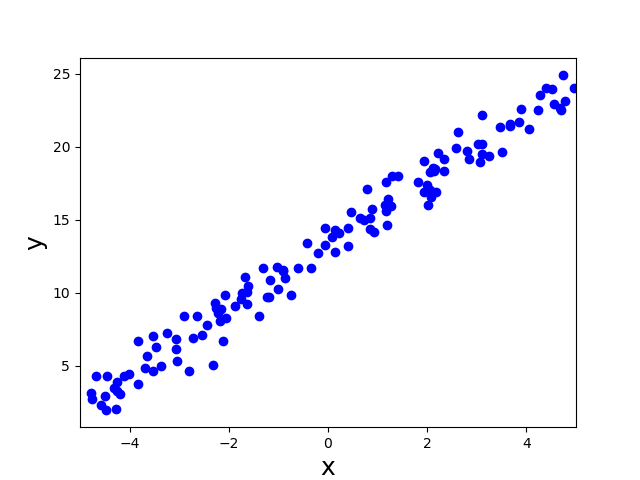

In [23]:
# 不要修改这里！
%matplotlib notebook
from helper import *

X,Y = generatePoints2D(seed)
vs_scatter_2d(X, Y)

## 3.2 拟合一条直线

### 3.2.1 猜测一条直线

<IPython.core.display.Javascript object>


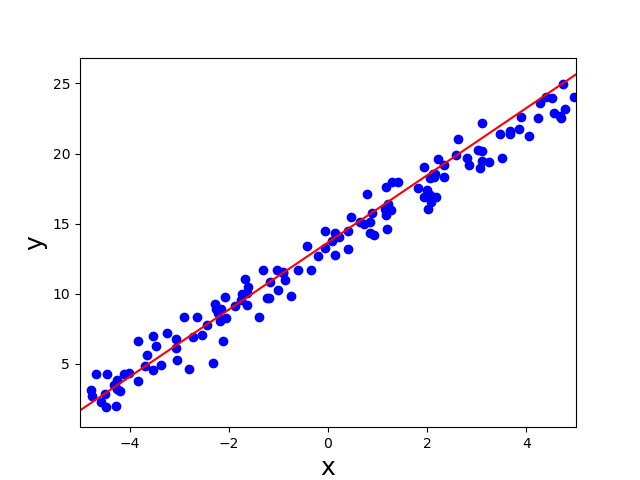

In [24]:
#TODO 请选择最适合的直线 y = mx + b
m1 = 2.3950
b1 = 13.6646

# 不要修改这里！
vs_scatter_2d(X, Y, m1, b1)

### 3.2.2 计算平均平方误差 (MSE)

我们要编程计算所选直线的平均平方误差(MSE), 即数据集中每个点到直线的Y方向距离的平方的平均数，表达式如下：
$$
MSE = \frac{1}{n}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

In [25]:
# TODO 实现以下函数并输出所选直线的MSE
def calculateMSE2D(X,Y,m,b):
    n = len(X)
    for i in range(n):
        s_sum = 0
        s_sum += (Y[i] - m * X[i] - b) ** 2
        
    MSE = 1.0 / n * s_sum
    return MSE

# TODO 检查这里的结果, 如果你上面猜测的直线准确, 这里的输出会在1.5以内
print(calculateMSE2D(X,Y,m1,b1))

0.0139092257212


### 3.2.3 调整参数 $m, b$ 来获得最小的平方平均误差

你可以调整3.2.1中的参数 $m1,b1$ 让蓝点均匀覆盖在红线周围，然后微调 $m1, b1$ 让MSE最小。

## 3.3 (选做) 找到参数 $m, b$ 使得平方平均误差最小

**这一部分需要简单的微积分知识(  $ (x^2)' = 2x $ )。因为这是一个线性代数项目，所以设为选做。**

刚刚我们手动调节参数，尝试找到最小的平方平均误差。下面我们要精确得求解 $m, b$ 使得平方平均误差最小。

定义目标函数 $E$ 为
$$
E = \frac{1}{2}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

因为 $E = \frac{n}{2}MSE$, 所以 $E$ 取到最小值时，$MSE$ 也取到最小值。要找到 $E$ 的最小值，即要找到 $m, b$ 使得 $E$ 相对于 $m$, $E$ 相对于 $b$ 的偏导数等于0. 

因此我们要解下面的方程组。

$$
\begin{cases}
\displaystyle
\frac{\partial E}{\partial m} =0 \\
\\
\displaystyle
\frac{\partial E}{\partial b} =0 \\
\end{cases}
$$

### 3.3.1 计算目标函数相对于参数的导数
首先我们计算两个式子左边的值

证明/计算：
$$
\frac{\partial E}{\partial m} = \sum_{i=1}^{n}{-x_i(y_i - mx_i - b)}
$$

$$
\frac{\partial E}{\partial b} = \sum_{i=1}^{n}{-(y_i - mx_i - b)}
$$

TODO 证明:

### 3.3.2 实例推演

现在我们有了一个二元二次方程组

$$
\begin{cases}
\displaystyle
\sum_{i=1}^{n}{-x_i(y_i - mx_i - b)} =0 \\
\\
\displaystyle
\sum_{i=1}^{n}{-(y_i - mx_i - b)} =0 \\
\end{cases}
$$

为了加强理解，我们用一个实际例子演练。

我们要用三个点 $(1,1), (2,2), (3,2)$ 来拟合一条直线 y = m*x + b, 请写出

- 目标函数 $E$, 
- 二元二次方程组，
- 并求解最优参数 $m, b$

TODO 写出目标函数，方程组和最优参数

### 3.3.3 将方程组写成矩阵形式

我们的二元二次方程组可以用更简洁的矩阵形式表达，将方程组写成矩阵形式更有利于我们使用 Gaussian Jordan 消元法求解。

请证明 
$$
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix} = X^TXh - X^TY
$$

其中向量 $Y$, 矩阵 $X$ 和 向量 $h$ 分别为 :
$$
Y =  \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix}
,
X =  \begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix},
h =  \begin{bmatrix}
    m \\
    b \\
\end{bmatrix}
$$

TODO 证明:

至此我们知道，通过求解方程 $X^TXh = X^TY$ 来找到最优参数。这个方程十分重要，他有一个名字叫做 **Normal Equation**，也有直观的几何意义。你可以在 [子空间投影](http://open.163.com/movie/2010/11/J/U/M6V0BQC4M_M6V2AJLJU.html) 和 [投影矩阵与最小二乘](http://open.163.com/movie/2010/11/P/U/M6V0BQC4M_M6V2AOJPU.html) 看到更多关于这个方程的内容。

### 3.4 求解 $X^TXh = X^TY$ 

在3.3 中，我们知道线性回归问题等价于求解 $X^TXh = X^TY$ (如果你选择不做3.3，就勇敢的相信吧，哈哈)

In [26]:
# TODO 实现线性回归
'''
参数：X, Y 存储着一一对应的横坐标与纵坐标的两个一维数组
返回：线性回归的系数(如上面所说的 m, b)
'''
def linearRegression2D(X,Y):
    
    # 一维数组X转矩阵，一维数组Y转矩阵
    matxX = [[x, 1] for x in X]
    matxY = [[y] for y in Y]
    
    # 获得 A 和 b
    A = matxMultiply(transpose(matxX),matxX)
    b = matxMultiply(transpose(matxX),matxY)
    
    # 高斯消元求解
    h = gj_Solve(A, b, decPts=4, epsilon=1.0e-16)

    m, b = 0.0, 0.0

    if not h:
        return m, b

    h_len = len(h)
    if h_len > 0:
        m = h[0][0]
    if h_len > 1:
        b = h[1][0]
    return m, b

m2,b2 = linearRegression2D(X,Y)
assert isinstance(m2,float),"m is not a float"
assert isinstance(b2,float),"b is not a float"
print(m2,b2)

[[2.2325], [13.0348]]
(2.2325, 13.0348)


# 请不要修改下面的代码
m2,b2 = linearRegression2D(X,Y)
assert isinstance(m2,float),"m is not a float"
assert isinstance(b2,float),"b is not a float"
print(m2,b2)

你求得的回归结果是什么？
请使用运行以下代码将它画出来。

<IPython.core.display.Javascript object>


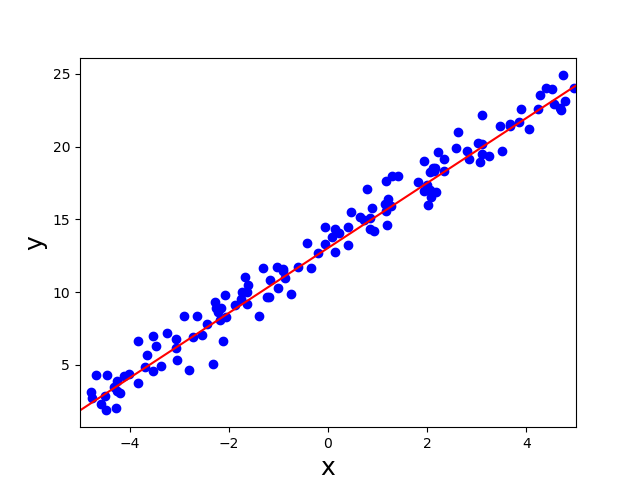

0.0025420041638


In [27]:
## 请不要修改下面的代码
vs_scatter_2d(X, Y, m2, b2)
print(calculateMSE2D(X,Y,m2,b2))

## Bonus !!!
如果你的高斯约当消元法通过了单元测试, 那么它将能够解决多维的回归问题  
你将会在更高维度考验你的线性回归实现

<IPython.core.display.Javascript object>


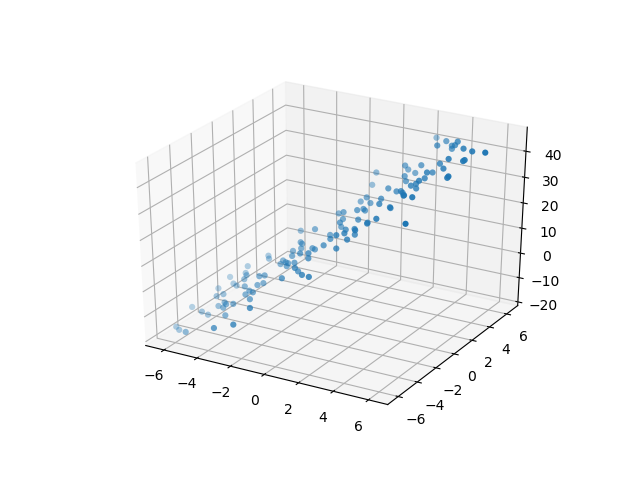

In [28]:
# 生成三维的数据点
X_3d, Y_3d = generatePoints3D(seed)
vs_scatter_3d(X_3d, Y_3d)

你的线性回归是否能够对付三维的情况?

In [29]:
def linearRegression(X,Y):
    return None

<IPython.core.display.Javascript object>


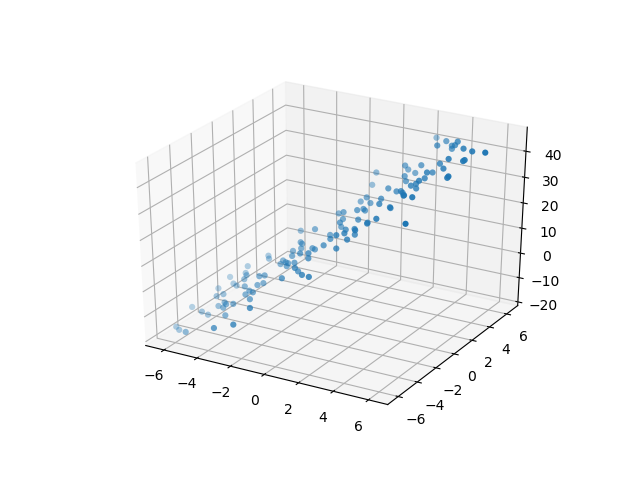

In [30]:
coeff = linearRegression(X_3d, Y_3d)
vs_scatter_3d(X_3d, Y_3d, coeff)